# Fitbit Exploratory Analysis

## Table of Contents

### *1 Introduction*
### *2 Importing Packages and creating wd*
### *3 Daily activity analysis*
### *4 Daily sleep analysis*
### *5 Finding when the workouts are done by individuals on average*
### *6 Checking calories burnt and Intensity of workout to check correlation*
####     *6.1 Importing datasets and visualizing individually*
####     *6.2 Checking correlation between intensity and calories*
### *7 Relationship between BMI and Weight*

## 1 Introduction

**Data used-** 

  - Fitbit Fitness Tracker data
  - Source: https://www.kaggle.com/arashnic/fitbit 
  - Background on the data: 33 users consented to use their minute- level data which was captured between 12-4-2016 to 12-05-2016.
  - License: CC0 1.0 Universal (CC0 1.0) Public Domain Dedication
  - User data is anonymous, taken from Amazon hence credible and authentic. 


## 2 Importing Packages and creating wd 

  First, we need the following packages:   
  - Tidyverse  
  - Readr  
  - Readxl  
  - Skimr  
  - sqldf

In [1]:
library(tidyverse)
library(readr)
library(readxl)
library(skimr)
library(sqldf)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.6     v dplyr   1.0.7
v tidyr   1.1.4     v stringr 1.4.0
v readr   2.1.0     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Loading required package: gsubfn

Loading required package: proto

Loading required package: RSQLite



In [2]:
# Creating wd variable
wd <- getwd()
wd

[1] "E:/Projects/Fitbit EA/Repo files"

## 3 Daily activity analysis

First, we create dataframes for daily activity which is stored in the working directory

In [3]:
daily_act_df <- read_csv(paste0(wd,"/dailyActivity_merged.csv"))

Rows: 940 Columns: 15

-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [4]:
head(daily_act_df)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


In [5]:
# Based on the file given, we know that we have a total of 33 users' data in our dataset. 
# Now we set out to find how many people are doing intense workouts by using sqldf.

sqldf("select count(distinct Id) as Distinct_users from daily_act_df where VeryActiveDistance > 0")

Distinct_users
<int>
33


In [6]:
# Based on above data, we find that all 33 users are doing sprints or high- intensity workouts

# Let us calculate the average values


Avg_daily_df <- sqldf("select round(avg(TotalSteps),0) as Avg_steps, round(avg(TotalDistance),1) as Avg_Distance,
    round(avg(VeryActiveDistance),1) as Avg_Sprint ,
     round(avg(Calories),2) as Avg_Calories from daily_act_df")

Avg_daily_df <- sqldf("select *, round(Avg_Sprint/ Avg_distance,2) as sprint_to_distance_ratio
    from Avg_daily_df")

Avg_daily_df

Avg_steps,Avg_Distance,Avg_Sprint,Avg_Calories,sprint_to_distance_ratio
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7638,5.5,1.5,2303.61,0.27


**Summary**

 - From the above summary of daily activity, we understand that **Avg steps taken were 7638** wherease the recommended steps are 10,000 steps.
 - All 33 people did intense workout and it was **27%** out of total workout. 

In [7]:
# Find relationship between very active distance and calorie burnt

intensity_cal_corr <- daily_act_df  %>% select(Id, VeryActiveDistance, TotalDistance, Calories)

#Find average of Total KM, Very intense workout distance and calories for all 33 users
intensity_cal_corr <- intensity_cal_corr  %>%  group_by(Id)  %>% summarise(mean_Very_Active_KM= round(mean(VeryActiveDistance),1), 
                                                     mean_Total_KM= round(mean(TotalDistance),1),
                                                     mean_calorie=round(mean(Calories),2))

#Add ratio of the intense workout to total workout and graph the relationship between the ratio and calories burnt for all users
intensity_cal_corr <- intensity_cal_corr  %>% mutate(Active_total_ratio= round(mean_Very_Active_KM/mean_Total_KM,2))
intensity_cal_corr <- intensity_cal_corr %>% arrange(Active_total_ratio)
head(intensity_cal_corr)


Id,mean_Very_Active_KM,mean_Total_KM,mean_calorie,Active_total_ratio
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1844505072,0.0,1.7,1573.48,0.00
2026352035,0.0,3.5,1540.65,0.00
8792009665,0.0,1.2,1962.31,0.00
6117666160,0.1,5.3,2261.14,0.02
6290855005,0.1,4.3,2599.62,0.02
2320127002,0.1,3.2,1724.16,0.03


## 4 Daily sleep analysis

Let us get the daily sleep data and store it in *sleep_df* dataframe. Next, we will check the average sleep summary to see whether they follow the **CDC recommendation of 6-7 hours/day.**

In [8]:
sleep_df <- read_csv(paste0(wd,"/sleepDay_merged.csv"))
head(sleep_df)

Rows: 413 Columns: 5

-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


In [9]:
sleep_summary <- sqldf("select round(avg(TotalMinutesAsleep),0) as Avg_min_slept
      from sleep_df")

sqldf("select round(Avg_min_slept/60,2) as Sleep_hours from sleep_summary")

# From the table, we see that the sleep average is as per recommendation

Sleep_hours
<dbl>
6.98


## 5 Finding when the workouts are done by individuals on average

In [10]:
hourly_steps_df <- read_csv(paste0(wd,"/hourlySteps_merged.csv"))
head(hourly_steps_df)

Rows: 22099 Columns: 3

-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (1): ActivityHour
dbl (2): Id, StepTotal


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



Id,ActivityHour,StepTotal
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,373
1503960366,4/12/2016 1:00:00 AM,160
1503960366,4/12/2016 2:00:00 AM,151
1503960366,4/12/2016 3:00:00 AM,0
1503960366,4/12/2016 4:00:00 AM,0
1503960366,4/12/2016 5:00:00 AM,0


In [11]:
#Get only the time of hours in Number using SEPARATE function
corrected_hourly_steps <- hourly_steps_df  %>% separate("ActivityHour", into= c("date", "hours", "minutes", "seconds", "AM_PM"),
                                                        sep= "([:, ])")
corrected_hourly_steps <- corrected_hourly_steps  %>% unite("Time_new", c("hours", "AM_PM"), sep= " ")

corrected_hourly_steps <- subset(corrected_hourly_steps, select= c("Id", "Time_new", "StepTotal"))

head(corrected_hourly_steps)

Id,Time_new,StepTotal
<dbl>,<chr>,<dbl>
1503960366,12 AM,373
1503960366,1 AM,160
1503960366,2 AM,151
1503960366,3 AM,0
1503960366,4 AM,0
1503960366,5 AM,0


In [12]:
# Create reference ID for time plot

hour_ref_df <- sqldf("SELECT distinct Time_new FROM corrected_hourly_steps")

ref= c("00:00", "01:00", "02:00", "03:00", "04:00", "05:00", "06:00", 
"07:00", "08:00", "09:00", "10:00", "11:00", "12:00", "13:00", "14:00", "15:00", "16:00", "17:00", "18:00", "19:00",
                                       "20:00", "21:00", "22:00", "23:00")
hour_ref_df <- hour_ref_df  %>% mutate(ref_hr= ref)
head(hour_ref_df)

,Time_new,ref_hr
,<chr>,<chr>
1,12 AM,00:00
2,1 AM,01:00
3,2 AM,02:00
4,3 AM,03:00
5,4 AM,04:00
6,5 AM,05:00


In [13]:
# Summarise by time and find the steps taken at each hour

summary_hourly_steps <-corrected_hourly_steps  %>% group_by(Time_new)  %>% summarise(avg_steps= round(mean(StepTotal)))

# JOIN hour reference and summary table using SQL LEFT JOIN
summary_hourly_steps<- sqldf("SELECT ref_hr, sum.Time_new, avg_steps FROM summary_hourly_steps as sum 
LEFT JOIN hour_ref_df as hr_ref ON sum.Time_new= hr_ref.Time_new")

summary_hourly_steps <- summary_hourly_steps  %>% arrange(ref_hr)

# Add peak steps for hours having more than 500 steps

summary_hourly_steps<- summary_hourly_steps  %>% mutate(peak= ifelse(avg_steps<500, "No", "Yes"))
head(summary_hourly_steps)


,ref_hr,Time_new,avg_steps,peak
,<chr>,<chr>,<dbl>,<chr>
1,00:00,12 AM,42,No
2,01:00,1 AM,23,No
3,02:00,2 AM,17,No
4,03:00,3 AM,6,No
5,04:00,4 AM,13,No
6,05:00,5 AM,44,No


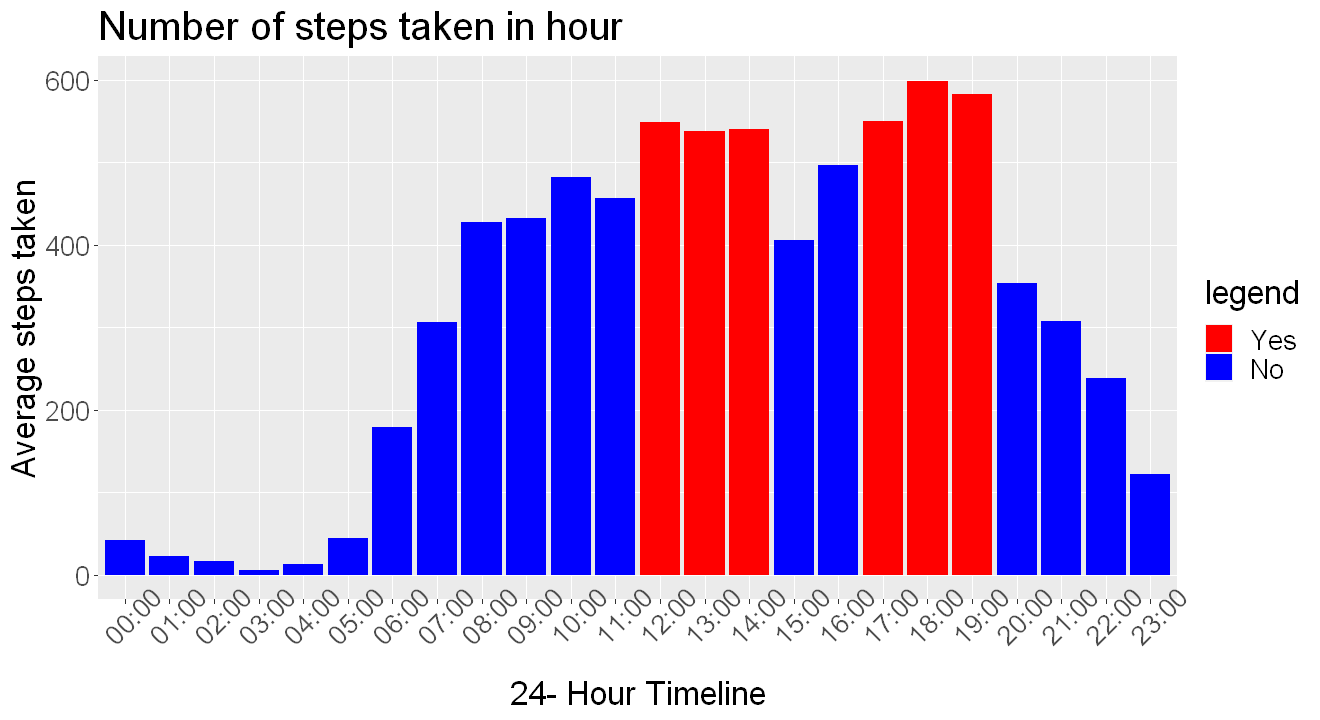

In [14]:
options(repr.plot.width= 11,repr.plot.height= 6) #change plot width and height(VERY IMPORTANT)

ggplot(summary_hourly_steps, aes(x= ref_hr, y= avg_steps, fill= peak)) + geom_col() + theme(text = element_text(size=15) ,
        axis.text.x = element_text(angle=45)) + labs(title= "Number of steps taken in hour", x= "24- Hour Timeline", 
                                                        y= "Average steps taken") +
        scale_fill_manual("legend", values = c("Yes" = "red", "No" = "blue")) + theme(text = element_text(size=20))

**Summary for the plot**

* The above graph shows the number of steps taken on average by all 33 users from 00:00 hrs to 23:00 hrs
* We find that the users have been very active between 08:00AM and 07:00PM which is the office time
* It has peaked to 550- 600 steps during lunch-time(12:00PM- 02:00PM) and evening time(05:00PM- 07:00PM). 
* The average steps between morning transportation and evening transportation varies because normally, **we go straight to office at morning but do errands like shopping when returning home**


## 6 Checking calories burnt and Intensity of workout to check correlation

we are going to use hourly intensity dataset and hourly calories dataset for this section. This dataset contains hourly observation for all 33 users individually. Hence we are manipulating data in Excel before importing here.

**Data manipulation in Excel**- Before we import the datasets, we are going to manipulate the dataset to get the hourly summary of average intensity and calories for all 33 users.

### 6.1 Importing datasets and visualizing individually

,hours,mean_totalIntensity,mean_averageIntensity
,<int>,<dbl>,<dbl>
1,0,2.13,0.04
2,1,1.42,0.02
3,2,1.04,0.02
4,3,0.44,0.01
5,4,0.63,0.01
6,5,4.95,0.08


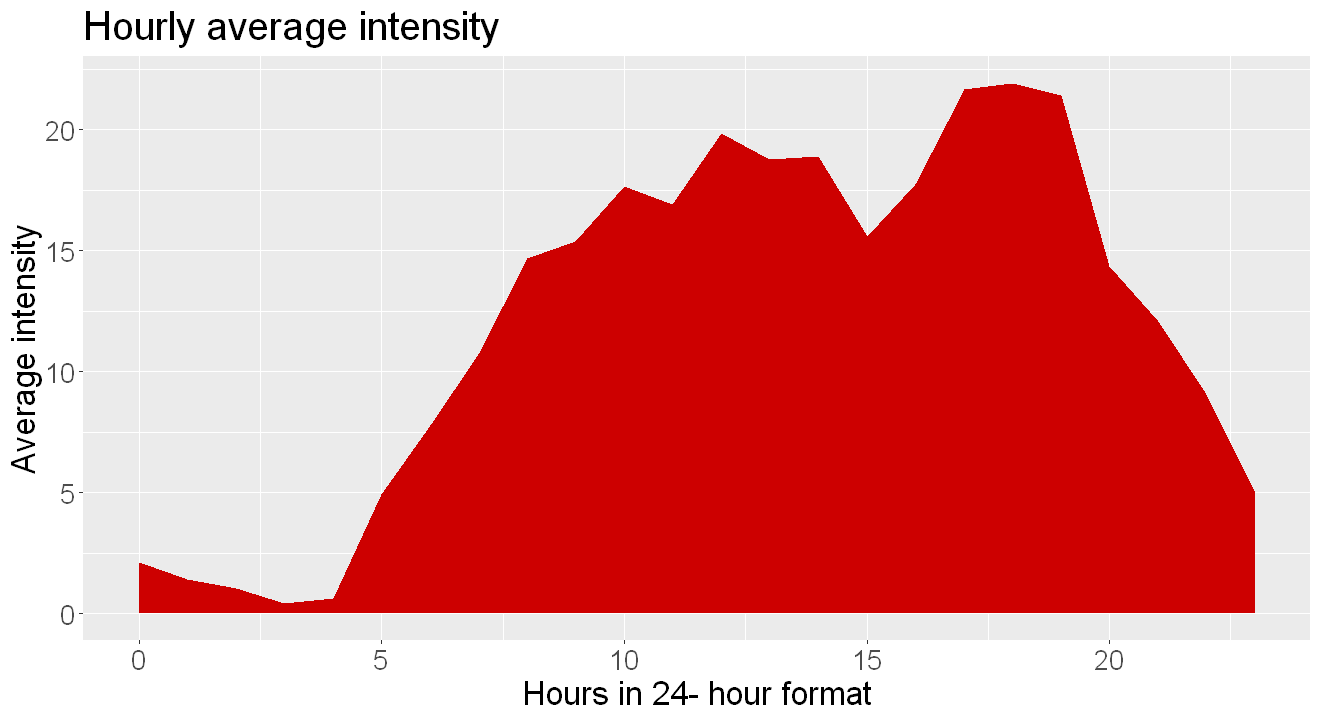

In [15]:
# importing and visualizing hourly intensity dataset
hr_intensity= read.csv(paste0(wd,"/hourlyIntensities_updated.csv"))
head(hr_intensity)

ggplot(hr_intensity, aes(x= hours, y= mean_totalIntensity)) + geom_area(fill= "red3") + theme(text = element_text(size=20)) + 
    labs(title= "Hourly average intensity", x= "Hours in 24- hour format", y= "Average intensity")

,hours,mean_cal
,<int>,<dbl>
1,0,71.81
2,1,70.17
3,2,69.19
4,3,67.54
5,4,68.26
6,5,81.71


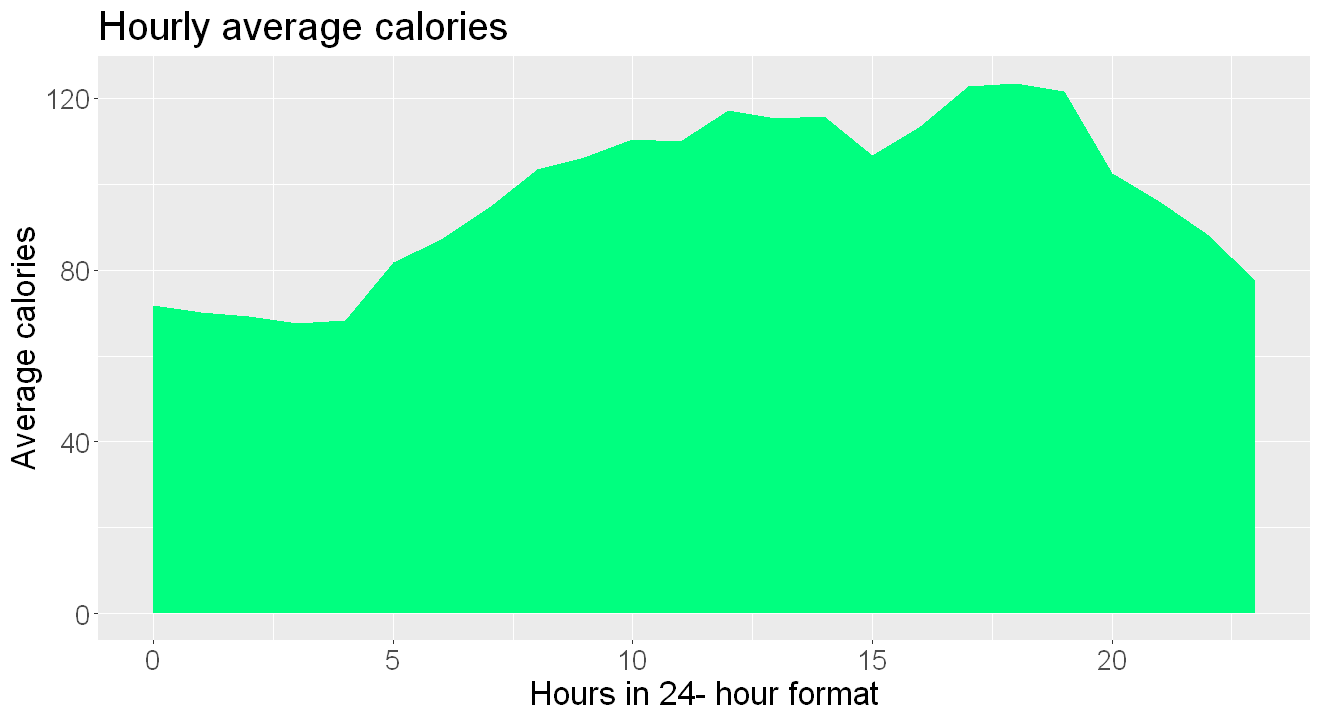

In [16]:
# importing hourly calories dataset
hr_calories= read.csv(paste0(wd,"/hourlyCalories_updated.csv"))
head(hr_calories)

ggplot(hr_calories, aes(x= hours, y= mean_cal)) + geom_area(fill= "springgreen1") + theme(text = element_text(size=20)) + 
    labs(title= "Hourly average calories", x= "Hours in 24- hour format", y= "Average calories")

### 6.2 Checking correlation between intensity and calories

In [17]:
# Line graphs to understand relationship between intensity and calories
comb_intensity_cal<- sqldf("SELECT i.hours, mean_totalIntensity, mean_averageIntensity, 
                        mean_cal FROM hr_intensity i JOIN hr_calories c ON i.hours= c.hours")
head(comb_intensity_cal)

,hours,mean_totalIntensity,mean_averageIntensity,mean_cal
,<int>,<dbl>,<dbl>,<dbl>
1,0,2.13,0.04,71.81
2,1,1.42,0.02,70.17
3,2,1.04,0.02,69.19
4,3,0.44,0.01,67.54
5,4,0.63,0.01,68.26
6,5,4.95,0.08,81.71


`geom_smooth()` using formula 'y ~ x'



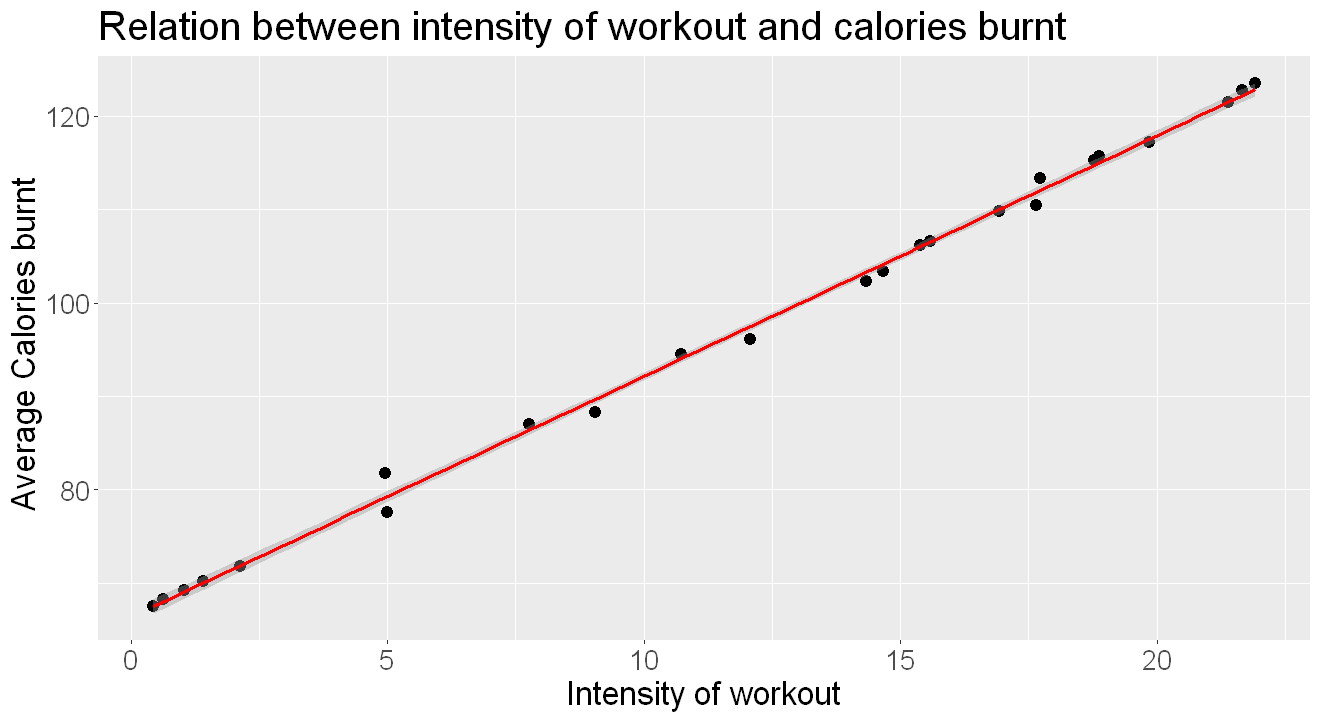

In [18]:
ggplot(comb_intensity_cal, aes(x= mean_totalIntensity, y= mean_cal)) + geom_point(size= 3, color= "black") +
        geom_smooth(method= 'lm', color= "red") + 
        labs(title= "Relation between intensity of workout and calories burnt", x= "Intensity of workout", y= " Average Calories burnt") +
        theme(text = element_text(size=20))

**Summary**

* From this combined dataset, we find that as average intensity of workout increases, the calories burnt also increases linearly. Hence we conclude that Average intensity has positive correlation with average calories burnt.

##  7 Relationship between BMI and Weight

We need to check the following after storing in a df:

* Out of 33 users, how many users updated their BMI and weight info.
* Check for any **outliers in the BMI value** and remove if necessary
* Understand the relationship between BMI and Weight

**Note**: *Outliers* are values that are very different from remaining values and probably wrong values. Hence, need to be removed while calculation.

In [19]:
weight_info <- read_csv(paste0(wd,"/weightLogInfo_merged.csv"))
head(weight_info)

Rows: 67 Columns: 8

-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (1): Date
dbl (6): Id, WeightKg, WeightPounds, Fat, BMI, LogId
lgl (1): IsManualReport


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,5/2/2016 23:59,52.6,115.9631,22,22.65,TRUE,1.46223e+12
1503960366,5/3/2016 23:59,52.6,115.9631,NA,22.65,TRUE,1.46232e+12
1927972279,4/13/2016 1:08,133.5,294.3171,NA,47.54,FALSE,1.46051e+12
2873212765,4/21/2016 23:59,56.7,125.0021,NA,21.45,TRUE,1.46128e+12
2873212765,5/12/2016 23:59,57.3,126.3249,NA,21.69,TRUE,1.46310e+12
4319703577,4/17/2016 23:59,72.4,159.6147,25,27.45,TRUE,1.46094e+12


In [20]:
sqldf("select count(distinct Id) as ID_count from weight_info")
# we see that only 8 people have measured that weight values. We need to check whether any wrong BMI value is there

ID_count
<int>
8


In [21]:
sqldf("select Id, BMI, IsManualReport from weight_info where Id= 1927972279")

# This is giving wrong BMI of 47.54 . Hence we are removing this outlier. 

Id,BMI,IsManualReport
<dbl>,<dbl>,<lgl>
1927972279,47.54,FALSE


In [22]:
corrected_weight_info <- subset(weight_info, !BMI>=47.54)
corrected_weight_info  %>% arrange(-BMI)  %>% head()

# As per the corrected dataset, we see that the wrong BMI value has been removed

Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
5577150313,4/17/2016 9:17,90.7,199.9593,NA,28.00,FALSE,1.46088e+12
4558609924,4/25/2016 23:59,70.3,154.9850,NA,27.46,TRUE,1.46163e+12
4319703577,4/17/2016 23:59,72.4,159.6147,25,27.45,TRUE,1.46094e+12
4319703577,5/4/2016 23:59,72.3,159.3942,NA,27.38,TRUE,1.46241e+12
4558609924,5/1/2016 23:59,69.9,154.1031,NA,27.32,TRUE,1.46215e+12
4558609924,4/18/2016 23:59,69.7,153.6622,NA,27.25,TRUE,1.46102e+12


Id,avg_weight_lbs,avg_BMI
<dbl>,<dbl>,<dbl>
1503960366,115.9631,22.65000
2873212765,125.6635,21.57000
6962181067,135.7019,24.02800
4558609924,153.5299,27.21400
4319703577,159.5045,27.41500
8877689391,187.7144,25.48708
5577150313,199.9593,28.00000


`geom_smooth()` using formula 'y ~ x'



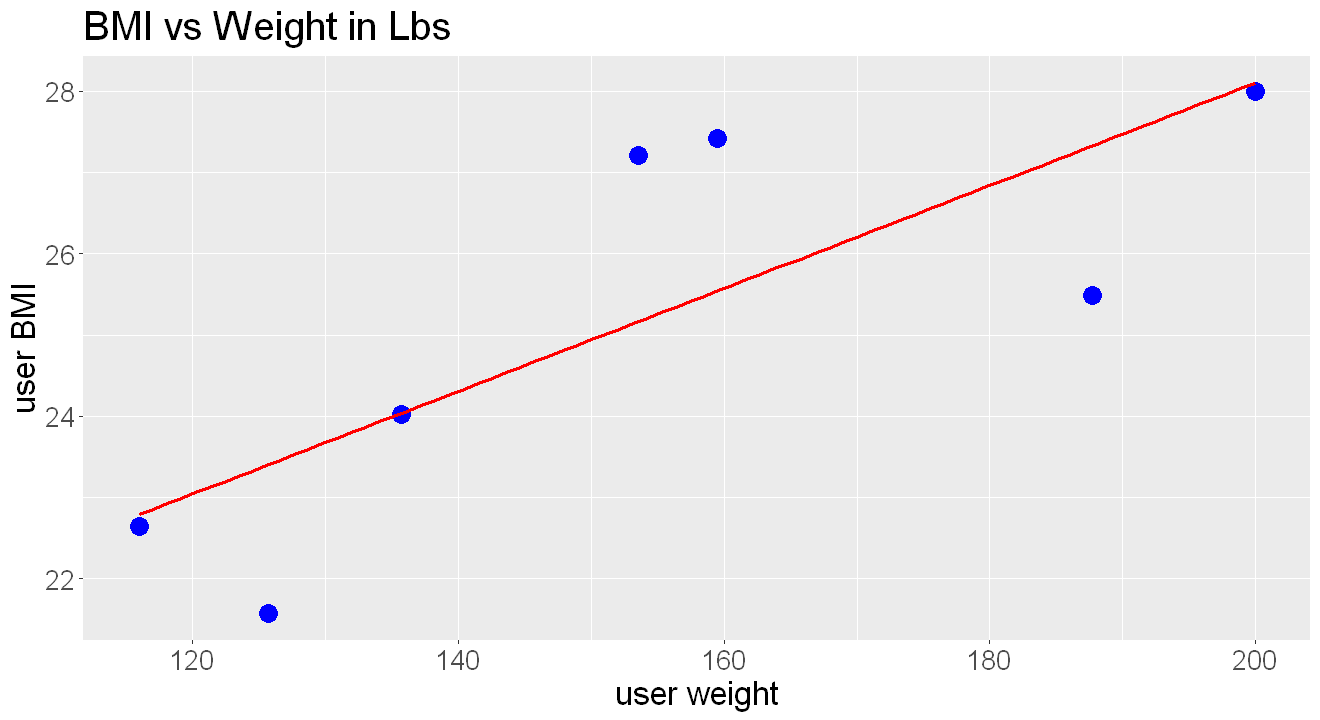

In [23]:
# Checking for relation

bmi_weight_cor <- corrected_weight_info  %>% group_by(Id)  %>% summarise(avg_weight_lbs= mean(WeightPounds),avg_BMI= mean(BMI))
bmi_weight_cor  %>% arrange(avg_weight_lbs)
ggplot(bmi_weight_cor, aes(x= avg_weight_lbs, y= avg_BMI))+ geom_point(color= "blue", size= 5)+ geom_smooth(method ='lm', se= FALSE, color= "red") +
labs(title= "BMI vs Weight in Lbs", x= "user weight", y="user BMI") + theme(text = element_text(size=20))

# From the graph below, we can find that there is positive correlation between BMI and weight